In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

https://chat.openai.com/share/11bc30d3-8c9b-42c4-af10-cbc7567e9b4c

In [3]:
sco_books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_books.sample(5)

,uri,title,author,editor,translator,introduction,illustrator,photographer,year,format,uncertain,ebook_url,volumes_issues,notes,event_count,borrow_count,purchase_count,circulation_years,updated
5945,https://shakespeareandco.princeton.edu/books/w...,The Wheel of Fire,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,True,NaN,NaN,Unidentified. Likely G. Wilson Knight's *The W...,2,2,0,1931;1939,2020-06-21T01:55:50+00:00
1458,https://shakespeareandco.princeton.edu/books/b...,Pot-Boilers,"Bell, Clive",NaN,NaN,NaN,NaN,NaN,1918,Book,False,https://archive.org/details/potboilers00bellia...,NaN,NaN,1,1,0,1935,2021-02-02T03:15:48+00:00
288,https://shakespeareandco.princeton.edu/books/e...,Daniel Deronda,"Eliot, George",NaN,NaN,NaN,NaN,NaN,1876,Book,False,https://archive.org/details/danielderondaby00e...,2 vols.,NaN,2,2,0,1936;1937,2020-07-14T04:28:20+00:00
5271,https://shakespeareandco.princeton.edu/books/v...,A Celebration for Edith Sitwell,NaN,"Villa, José García",NaN,NaN,NaN,NaN,1948,Book,False,NaN,NaN,NaN,1,1,0,1953,2020-07-15T19:30:46+00:00
5174,https://shakespeareandco.princeton.edu/books/b...,Passport for a Girl,"Borden, Mary",NaN,NaN,NaN,NaN,NaN,1939,Book,False,NaN,NaN,NaN,7,7,0,1940;1941,2020-06-29T03:35:29+00:00


In [4]:
ban_books = pd.read_csv('../data/banned_books.csv', encoding='utf-8', dtype={'date_banned': 'Int32'})
ban_books.sample(5)

,title,author,viaf_url,country,date_banned,source,note
72,Brave New World,"Huxley, Aldous",http://viaf.org/viaf/71392434,Ireland,1932,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,NaN
27,Une Vie,"Maupassant, Guy de",http://viaf.org/viaf/29537765,France,1883,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,NaN
202,Doomsday,"Deeping, Warwick",http://viaf.org/viaf/76774191,USA,<NA>,https://archive.org/details/censorshipinbost01...,NaN
53,Ulysses,"Joyce, James",http://viaf.org/viaf/44300643,USA,1918,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,Burned
91,The Young Manhood of Studs Lonigan,"Farrell, James T.",http://viaf.org/viaf/46775204,USA,1949,https://doi.org/10.1093/acprof:oso/97801996809...,Prosecuted


In [5]:
ban_books.columns

Index(['title', 'author', 'viaf_url', 'country', 'date_banned', 'source',
       'note'],
      dtype='object')

In [6]:
ban_books.shape

(253, 7)

In [7]:
ban_books_aut = ban_books[['author']]
ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)
ban_books_aut

C:\Users\dittm\AppData\Local\Temp\ipykernel_9132\3841930415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)


,ban_author
0,Aristophanes
1,Ovid
2,"Apuleius, Lucius"
3,"Shakespeare, William"
4,"Shakespeare, William"
...,...
248,"Lofting, Hugh"
249,"Dos Passos, John"
250,"Aragon, Louis"
251,"Stalin, Joseph"


In [8]:
ban_books_aut_unique = ban_books_aut.drop_duplicates()
ban_books_aut_unique.sample(10)

,ban_author
159,"Aldington, Richard"
196,"Arlen, Michael"
127,"Stoker, Bram"
3,"Shakespeare, William"
38,"Dreiser, Theodore"
93,"Gingrich, Arnold W."
221,"Gilbert, W. S."
78,"Hemingway, Ernest"
170,"Cronin, A. J."
105,"Fielding, Henry"


In [9]:
ban_books_aut_unique.shape

(184, 1)

In [10]:
sco_books_aut = sco_books[sco_books['format'] == 'Book'][['author', 'title', 'format', 'year', 'borrow_count']].dropna()
sco_books_aut.rename(columns={'author':'sco_author'}, inplace=True)
sco_books_aut = sco_books_aut[~sco_books_aut['sco_author'].str.contains(';')] # ~ negates condition
sco_books_aut = sco_books_aut[(sco_books_aut['year'] >= 1919) & (sco_books_aut['year'] <= 1941)] # book published between 1919 and 1941
# sco_books_aut = sco_books_aut[(sco_books_aut['borrow_count'] >= 0)]
sco_books_aut.shape

(3512, 5)

In [11]:
sco_books_aut.columns

Index(['sco_author', 'title', 'format', 'year', 'borrow_count'], dtype='object')

In [12]:
sco_books_aut.sample(10)

,sco_author,title,format,year,borrow_count
3759,"Smith, Eleanor",Ballerina,Book,1932,3
3265,"West, Rebecca",Harriet Hume: A London Fantasy,Book,1929,5
5138,"Vance, Ethel",Escape: A Novel Inside Germany,Book,1939,4
3048,"Smith, Grafton Elliot",In the Beginning: The Origin of Civilization,Book,1928,9
5006,"Wentworth, Patricia",Mr. Zero,Book,1938,6
3011,"Niles, Blair",Condemned to Devil's Island,Book,1928,1
2587,"Byrne, Donn",Hangman's House,Book,1926,4
3231,"Cowley, Malcolm",Blue Juniata,Book,1929,1
3555,"Bridges, Robert",The Testament of Beauty: A Poem in Four Books,Book,1930,3
5165,"Bottome, Phyllis",Murder in the Bud,Book,1939,16


Check how many books per author are in the dataset

In [13]:
sco_filter = sco_books_aut.loc[sco_books_aut['sco_author'] == 'Hemingway, Ernest']
sco_filter

,sco_author,title,format,year,borrow_count
2140,"Hemingway, Ernest",Three Stories and Ten Poems,Book,1923,1
2731,"Hemingway, Ernest",The Sun Also Rises,Book,1926,27
2735,"Hemingway, Ernest",The Torrents of Spring,Book,1926,2
2826,"Hemingway, Ernest",Men without Women,Book,1927,26
3216,"Hemingway, Ernest",A Farewell to Arms,Book,1929,25
3780,"Hemingway, Ernest",Death in the Afternoon,Book,1932,22
4160,"Hemingway, Ernest",Winner Take Nothing,Book,1933,20
4418,"Hemingway, Ernest",Green Hills of Africa,Book,1935,8
4927,"Hemingway, Ernest",To Have and Have Not,Book,1937,23
5061,"Hemingway, Ernest",The Fifth Column and the First Forty-Nine Stories,Book,1938,14


In [14]:
merged_df = pd.merge(ban_books_aut_unique, sco_books_aut, how='inner', left_on='ban_author', right_on='sco_author')

intersection_df = merged_df[~(merged_df['ban_author'].isna() | merged_df['sco_author'].isna())]
intersection_df.reset_index(drop=True, inplace=True)

intersection_df = intersection_df[['sco_author', 'ban_author']]

intersection_df.shape

(705, 2)

In [15]:
intersection_df.head(10)

,sco_author,ban_author
0,"Shakespeare, William","Shakespeare, William"
1,"Shakespeare, William","Shakespeare, William"
2,"Andersen, Hans Christian","Andersen, Hans Christian"
3,"Whitman, Walt","Whitman, Walt"
4,"Baudelaire, Charles","Baudelaire, Charles"
5,"Tolstoy, Leo","Tolstoy, Leo"
6,"Tolstoy, Leo","Tolstoy, Leo"
7,"Twain, Mark","Twain, Mark"
8,"Twain, Mark","Twain, Mark"
9,"Swinburne, Algernon Charles","Swinburne, Algernon Charles"


Top banned authors per books

In [16]:
duplicate_counts = intersection_df.groupby(['sco_author', 'ban_author']).size()

sorted_duplicate_counts = duplicate_counts.sort_values(ascending=False)

top_20_duplicates = sorted_duplicate_counts.head(20)


Top authors per books

In [17]:
total_books = sco_books_aut.groupby(['sco_author']).size()

sorted_total_books = total_books.sort_values(ascending=False)

top_20_total_duplicates = sorted_total_books.head(20)

top_20_total_duplicates


sco_author
Lawrence, D. H.           34
Walpole, Hugh             26
Huxley, Aldous            25
Wells, H. G.              23
Mackenzie, Compton        22
Maugham, W. Somerset      21
Galsworthy, John          20
Eliot, T. S.              20
Fletcher, Joseph Smith    20
Yeats, William Butler     19
Woolf, Virginia           17
Bennett, Arnold           16
Russell, Bertrand         16
Christie, Agatha          16
Wodehouse, P. G.          16
Kaye-Smith, Sheila        15
Stern, G. B.              15
Chesterton, G. K.         15
Young, Francis Brett      15
Ford, Ford Madox          14
dtype: int64

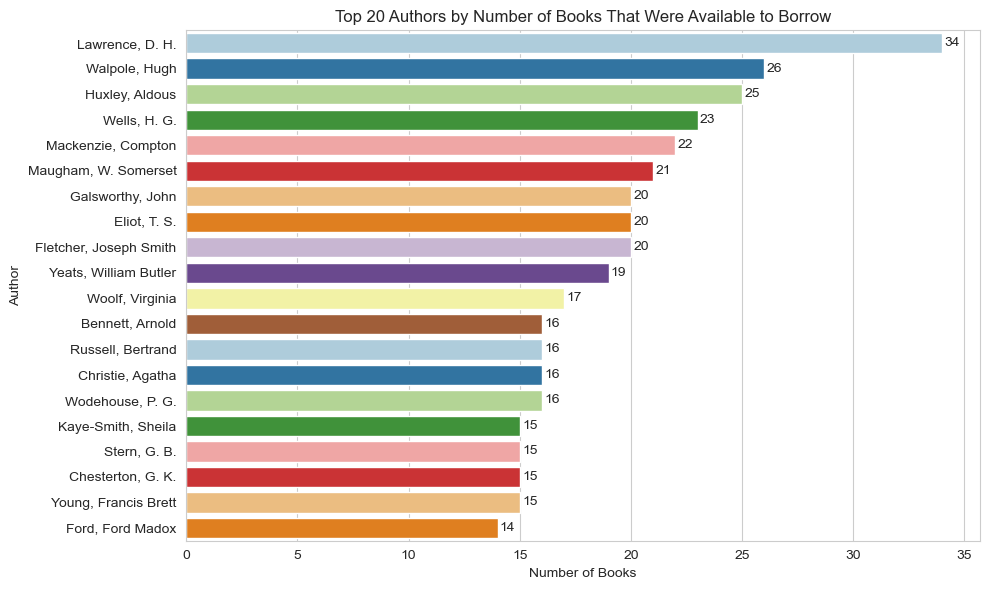

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_total_duplicates.values, y=top_20_total_duplicates.index, palette='Paired', orient='h')

# Add annotations
for index, value in enumerate(top_20_total_duplicates.values):
    plt.text(value + 0.1, index, str(value), ha='left', va='center')

plt.title('Top 20 Authors by Number of Books That Were Available to Borrow')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

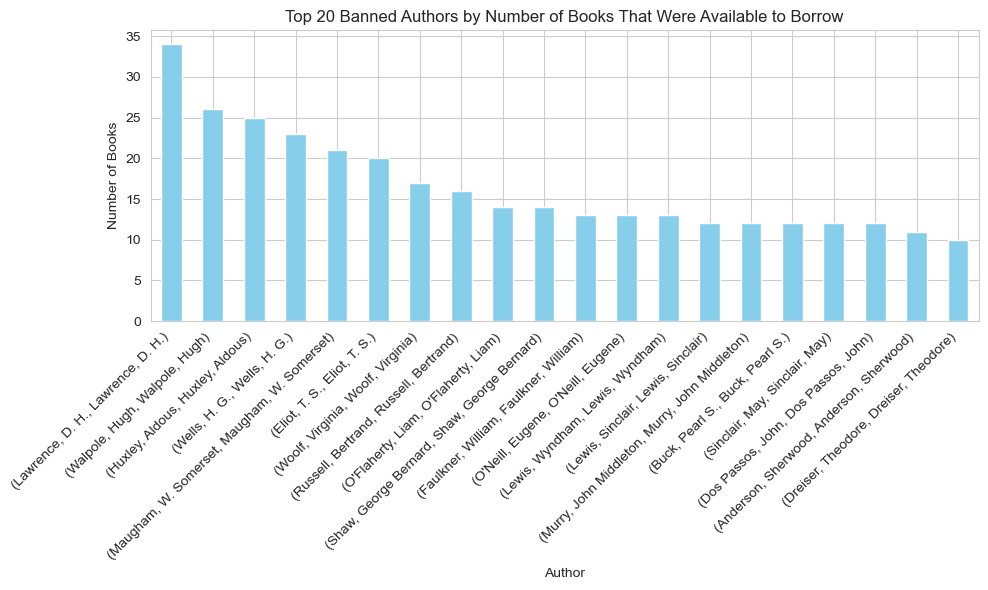

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_20_duplicates.plot(kind='bar', color='skyblue')
plt.title('Top 20 Banned Authors by Number of Books That Were Available to Borrow')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Ratio of banned authors within the first dataset: 0.20074031890660593


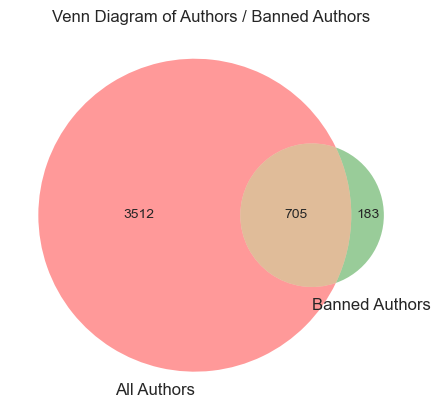

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Count occurrences of each author in both datasets
sco_authors_count = sco_books_aut['sco_author'].value_counts()
ban_authors_count = ban_books_aut_unique['ban_author'].value_counts()

# Find authors whose works were banned within the first dataset
banned_authors_in_dataset1 = set(sco_authors_count.index).intersection(set(ban_authors_count.index))

# Calculate the total count of authors in dataset 1
total_authors_in_dataset1 = sum(sco_authors_count)

# Calculate the total count of banned authors in dataset 1
total_banned_authors_in_dataset1 = sum(sco_authors_count[author] for author in banned_authors_in_dataset1)

# Calculate the ratio of banned authors within the first dataset
ratio_banned_authors = total_banned_authors_in_dataset1 / total_authors_in_dataset1

print("Ratio of banned authors within the first dataset:", ratio_banned_authors)

venn2(subsets=(total_authors_in_dataset1, len(ban_authors_count), total_banned_authors_in_dataset1), 
      set_labels=('All Authors', 'Banned Authors'))

plt.title('Venn Diagram of Authors / Banned Authors')
plt.show()